# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

 **Why people are  moving toword sharing bike?**

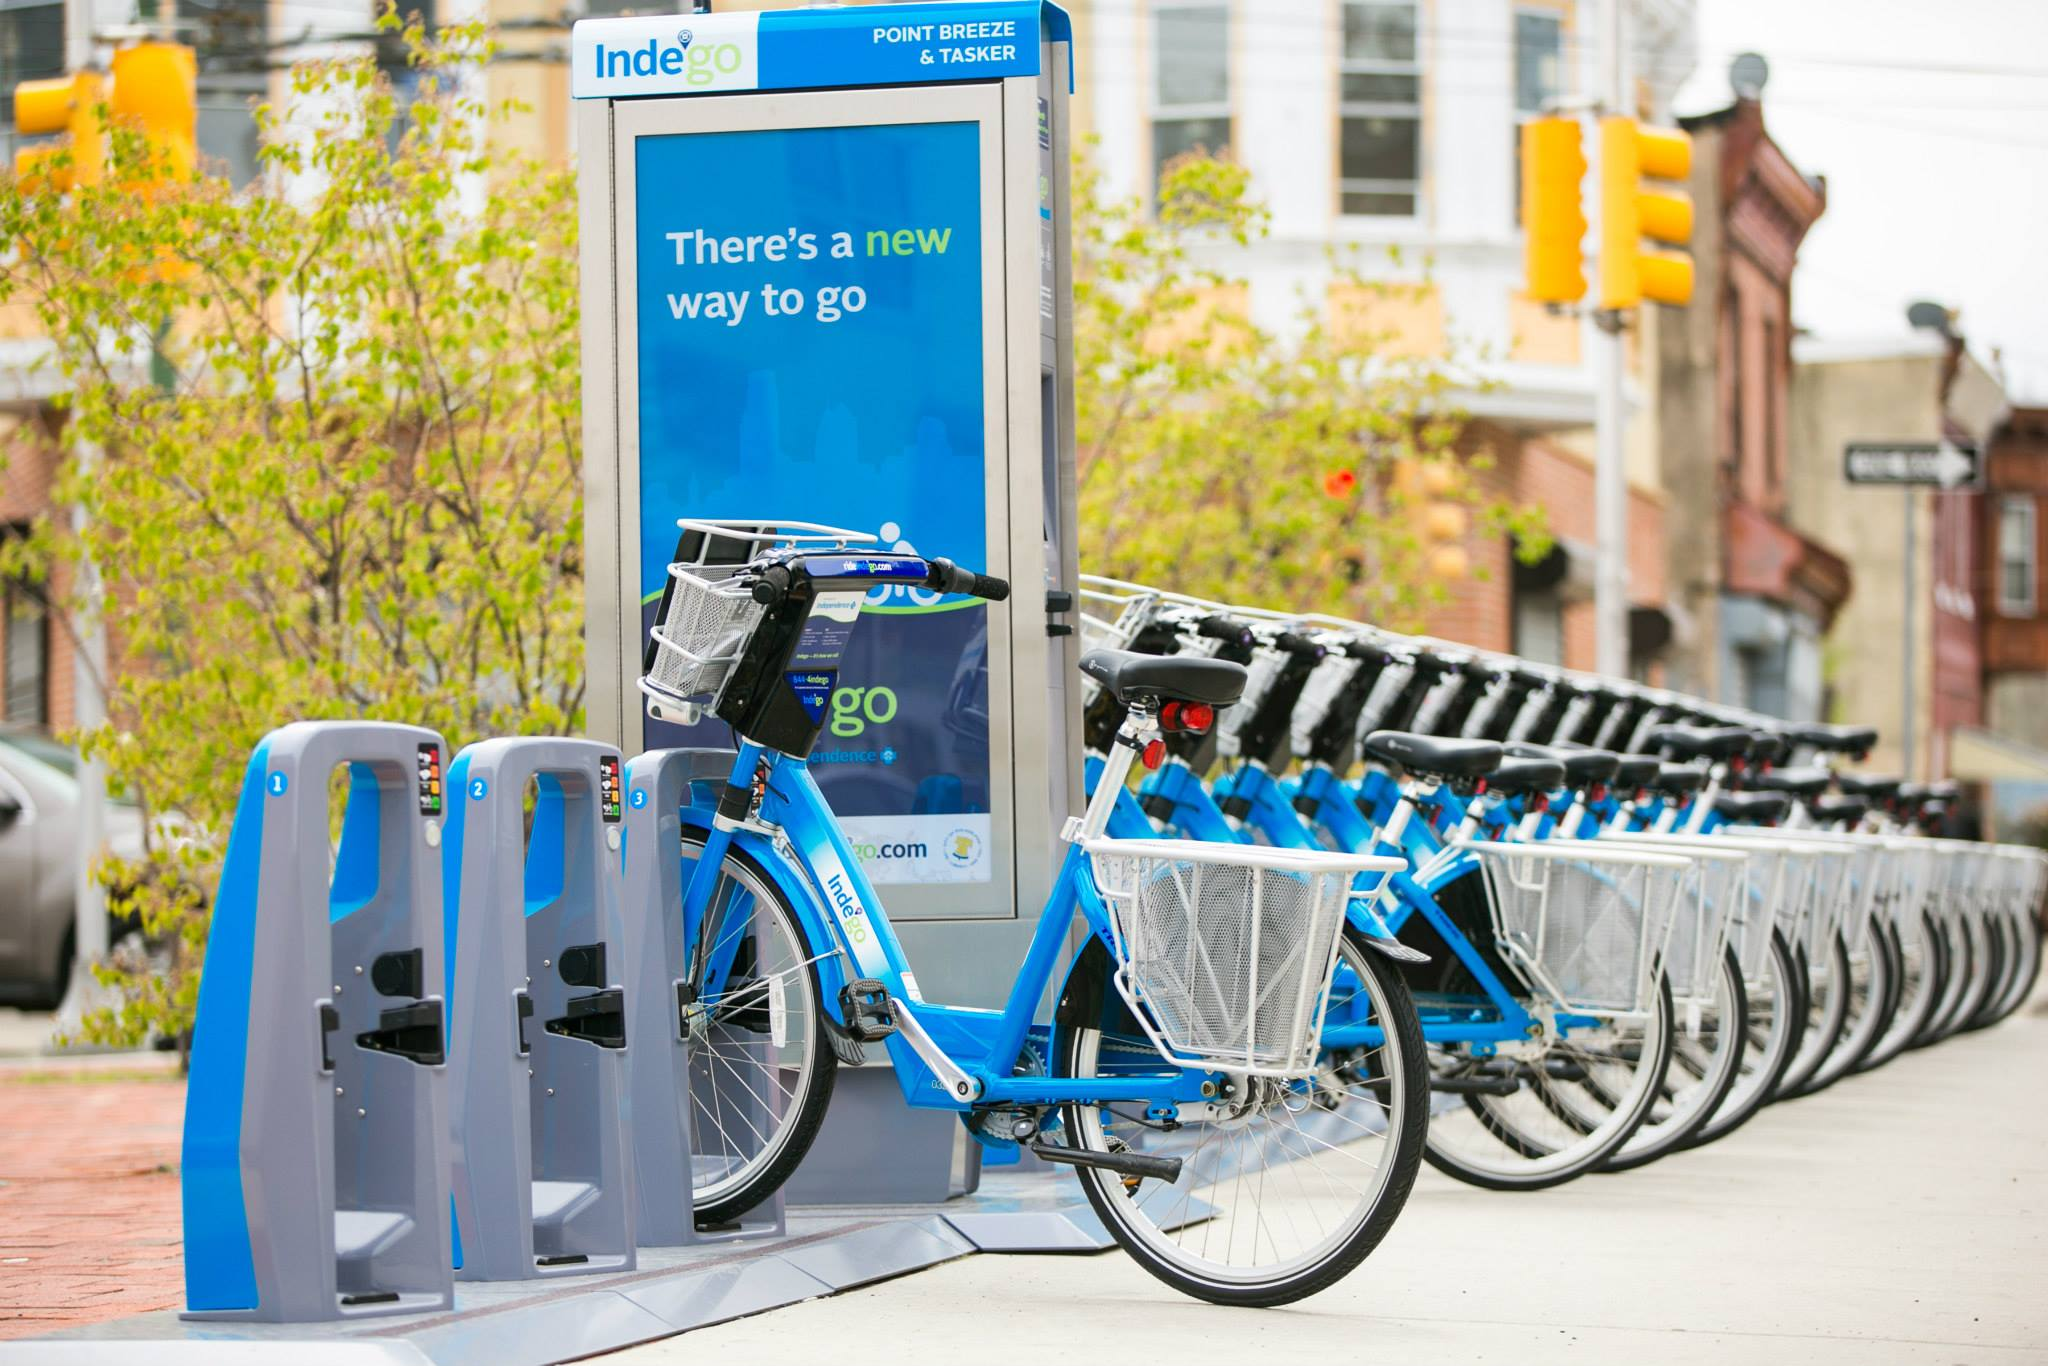

These bike sharing systems have become widely popular across different cities in the world.The elements of affordability and accessibility have helped in the promotion and expansion of the concept of a bike rental system. And it definitely comes across as a win-win for just about anyone who is willing to skip the expensive cab services for a bike.Discussions around the positive effects of bike sharing often focus on environmental sustainability and the personal health benefits experienced by users. When new bike share schemes are introduced, there’s often a reference to the “greening” of the city; ideally, more bikes can equal fewer cars, which leads to a reduction in greenhouse gases and an improvement in local air quality

## **Reason behind the project :-**


Bike share systems have been growing in popularity across the nations. The concept is simple. There are racks of bikes set up around the city, and people can rent a bike for a short period of time, even if only to get from point A to point B.Covid-19 has had a significant impact on shared mobility and more particularly on the use of shared bikes.As people reassess ground transportation options in the face of the COVID-19 pandemic, many are choosing isolated modes such as sharing bikes over public transportation.
This analysis focuses on factors that will  predict the overall drmand of 

## <b> Data Description </b>

 The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information


**Attribute Information:**

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## **Importing the Dependencies**

---



In [ ]:
#importing required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Data Collection**

---



In [ ]:
# loading the csv data to a Pandas DataFrame
import pandas as pd
file = r'/content/drive/MyDrive/Copy of SeoulBikeData.csv'
df = pd.read_csv(file, sep=',', encoding='latin')

In [ ]:
# printing 10 rows of the dataset
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
5592,22/07/2018,1088,0,28.1,56,0.2,2000,18.4,0.00,0.0,0.0,Summer,No Holiday,Yes
4905,23/06/2018,1072,9,24.3,37,1.1,1939,8.6,1.31,0.0,0.0,Summer,No Holiday,Yes
3330,18/04/2018,1918,18,16.6,33,3.4,1182,0.2,0.86,0.0,0.0,Spring,No Holiday,Yes
6726,07/09/2018,624,6,20.2,70,1.6,1690,14.5,0.00,0.0,0.0,Autumn,No Holiday,Yes
2837,29/03/2018,106,5,12.7,83,0.8,392,9.8,0.00,0.0,0.0,Spring,No Holiday,Yes


In [ ]:
# Loading last 5 rows of the dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#understanding some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# statistical measures about the data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Checking for Missing and Duplicate Values**

In [ ]:
# Checking Null Values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking Duplicate Values
len(df[df.duplicated()])

0

## **Preprocessing of dataset**

---



Preprocessing of Data can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance.as name suggest we prefer the preprocessing of data before training the model.Data preprocessing includes cleaning, Instance selection, normalization, transformation, feature extraction and selection, etc. The product of data preprocessing is the final training set 

In [ ]:
#Rename columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(癈)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(癈)':'DPT','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [ ]:
# Loading first 5 rows of the dataset
df.head(50)

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity,Wind_speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


**Converting date(dd/mm/yy)column to seprate Day,Month,Year columns.**

In [ ]:
#creating a new column as Day,Month,Year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
#creating a new column weekend
df['weekend']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [ ]:
#printing first 5 rows of the dataset
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity,Wind_speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0


In [ ]:
#droping columns Date,Day,Years.
df=df.drop(columns=['Date','Day','Year'],axis=1)

In [ ]:
#printing first 5 rows of the dataset
df.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity,Wind_speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [ ]:
#cheaking data type of columns 'Hour','Month','weekend'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented_Bike_Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity                   8760 non-null   int64  
 4   Wind_speed                 8760 non-null   float64
 5   Visibility                 8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar_Radiation            8760 non-null   float64
 8   Rainfall                   8760 non-null   float64
 9   Snowfall                   8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning_Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [ ]:
#changing Hour,Month,Weekend datatype to category
columns=['Hour','Month','weekend']
for col in columns:
  df[col]=df[col].astype('category')

In [ ]:
#cheaking for new data type of columns 'Hour','Month','weekend'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented_Bike_Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity                   8760 non-null   int64   
 4   Wind_speed                 8760 non-null   float64 
 5   Visibility                 8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar_Radiation            8760 non-null   float64 
 8   Rainfall                   8760 non-null   float64 
 9   Snowfall                   8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning_Day            8760 non-null   object  
 13  Month                      8760 n

In [ ]:
df.head(2)

,Rented_Bike_Count,Hour,Temperature(°C),Humidity,Wind_speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


## **Handeling Outliers**

Outlier treatment is another important step in data pre-processing (one may prefer doing missing value treatment once outliers are treated especially if using mean imputation as outlier can skew the data). Outlier as such is an observation that lies on an abnormal distance from other values or any observation far away from the mass of data or the overall pattern. Outliers can be mild and extreme with the extreme being away from the source by a great deal. Also, an outlier can be looked for in each variable (Univariate Outlier) or can be looked in relation to other variables (Bivariate Outlier).

### **Boxplot**

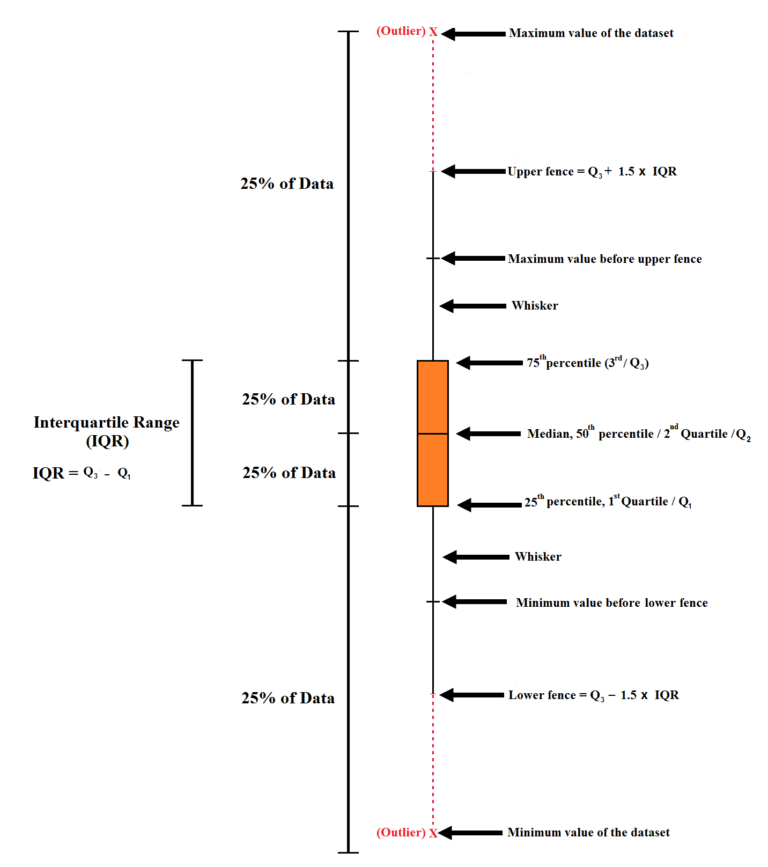

Here we are able to visualize the data points and see the outliers that lie far away. However, Boxplots are not commonly used as it takes a lot of time to cap outliers using boxplots if there are multiple features in a dataset. Also, other methods such as standard deviation and percentiles (discussed below) are equally reliable. Also for creating boxplots generally a lot of data is required and if there is an error while capping the outliers, we have to return to the boxplot all over again. Therefore boxplots are used in applications where high precision is required such as chemical trials, risk modeling etc where it takes weeks only to prepare the data. However, in other domains such as Marketing Analysis etc, other methods can be equally reliable.

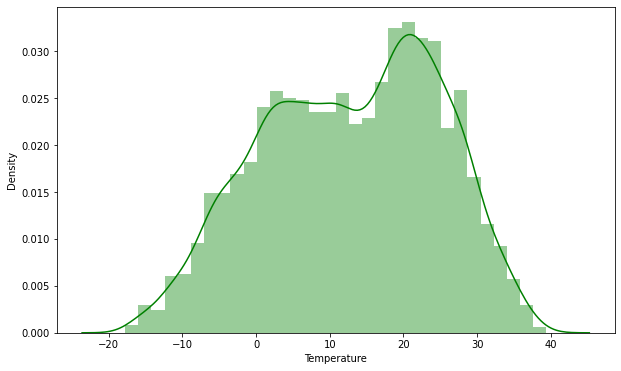

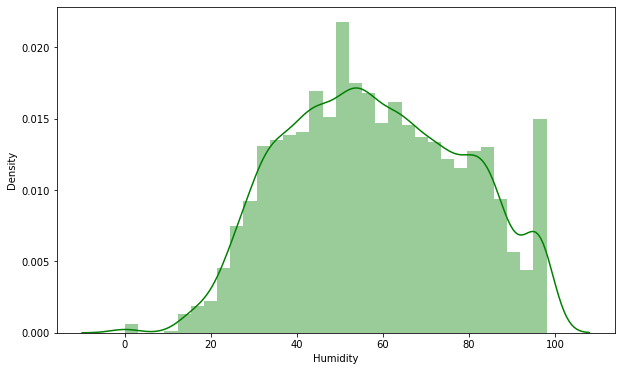

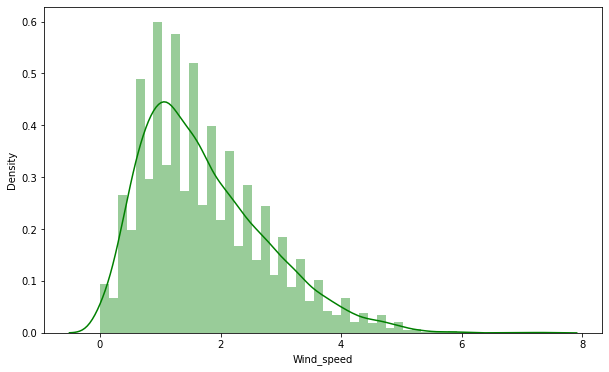

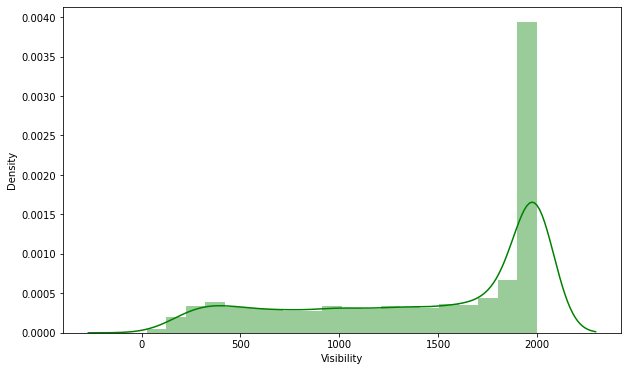

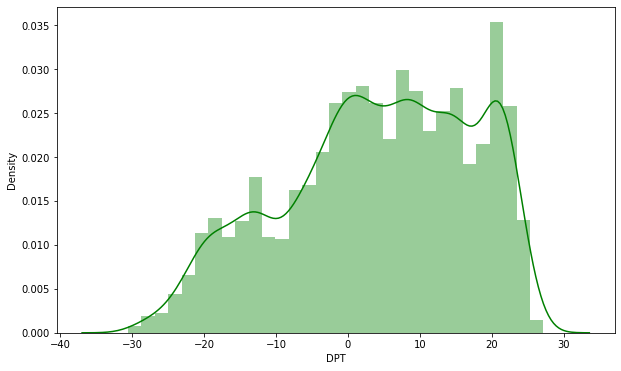

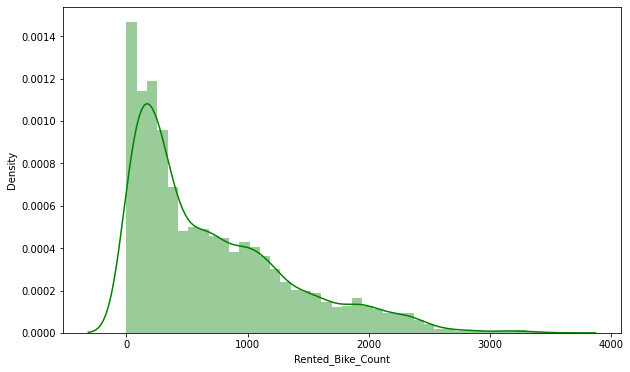

In [ ]:
#assign the numerical coulmn to variavle
columns=list(['Temperature','Humidity','Wind_speed','Visibility','DPT','Rented_Bike_Count'])
features=pd.Index(columns)
#analyz and distribution of all numerical features
for col in features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col] ,color="g")
  plt.xlabel(col)
plt.show()

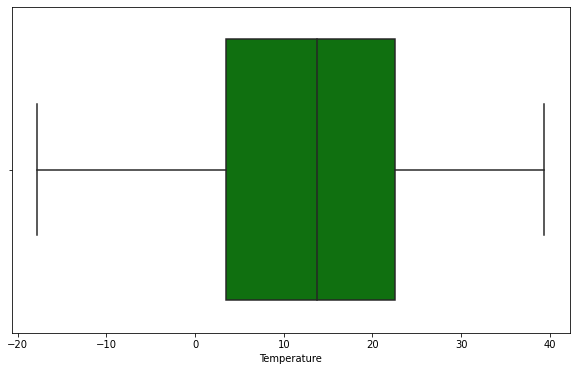

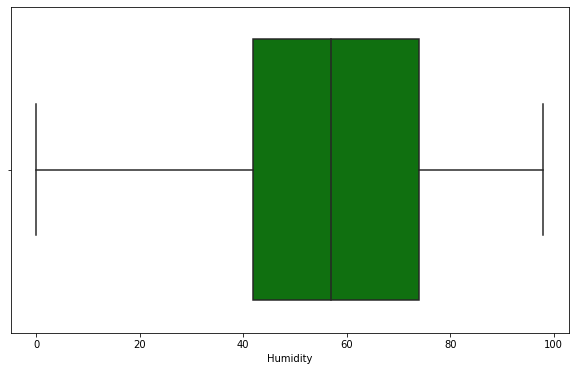

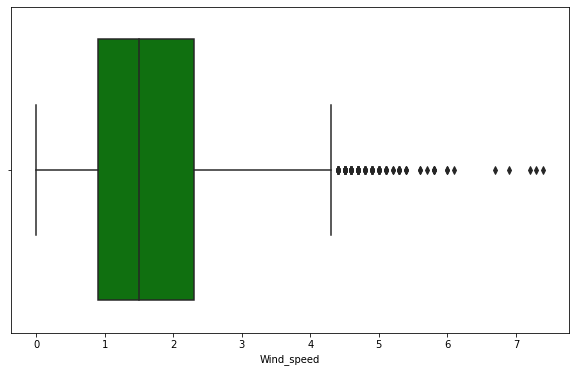

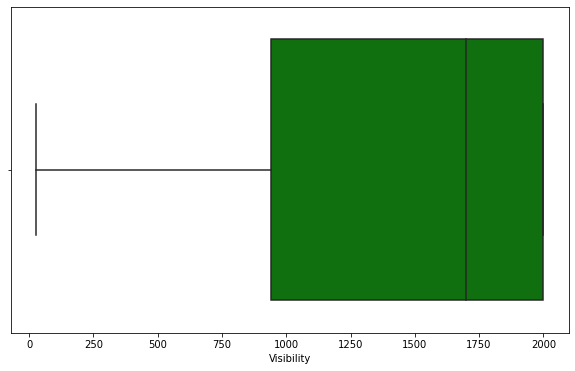

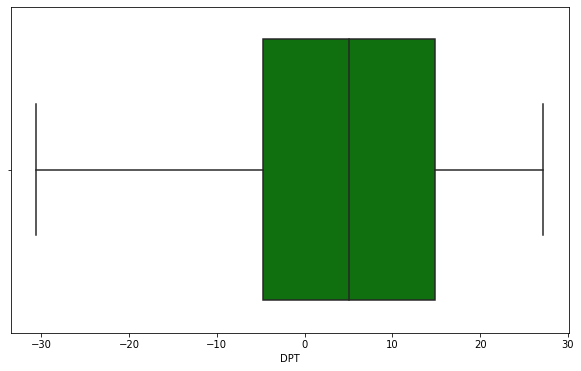

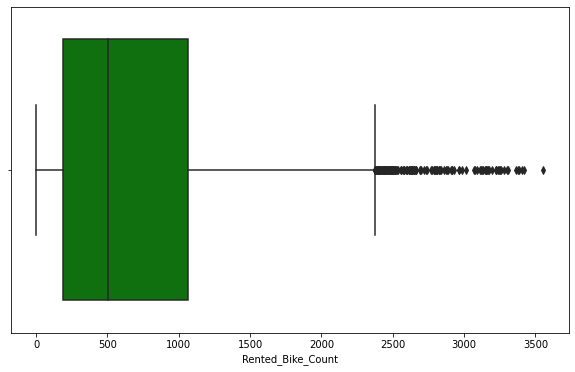

In [ ]:
#Ploting box plot for Temperature,Humidit',Wind_speed,Visibility,DPT,Rented_Bike_Count columns
for col in features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[col] ,color="g")
  plt.xlabel(col)
plt.show()

### **Quartile Ranges**
In a dataset, extreme data points are considered to be 3 times the interquartile range which is below the first quartile or above the third quartile whereas mild outliers lie between 1.5 times the interquartile range below the first quartile or above the third quartile.

* First quartile: 25% from smallest to largest of numbers
* Second quartile: between 25.1% and 50% (till median)
* Third quartile: 51% to 75% (above the median)
* Fourth quartile: 25% of largest numbers

In [ ]:
# Finding the IQR
percentile25 = df['Wind_speed'].quantile(0.25)
percentile75 = df['Wind_speed'].quantile(0.75)

iqr = percentile75 - percentile25

#Creating uperlimit and lowerlimit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

#Capping the values to the upper and lower limit
df['Wind_speed'] = np.where(df['Wind_speed'] > upper_limit,upper_limit,np.where(
df['Wind_speed'] < lower_limit,lower_limit,df['Wind_speed']))

Upper limit 4.3999999999999995
Lower limit -1.1999999999999997


**Here in the dataset, we have few mild outliers. In this dataset, any value which is above 4.399 will be capped at 4.399 while any value below -1.199 will be capped at -1.199. In this dataset, we didn’t find any extreme outliers.**

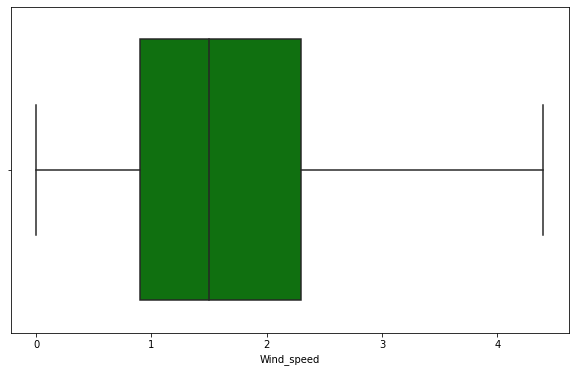

In [ ]:
#Ploting box plot for Wind_speed
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Wind_speed'] ,color="g")
plt.xlabel('Wind_speed')
plt.show()

In [ ]:
# Finding the IQR
percentile25 = df['Rented_Bike_Count'].quantile(0.25)
percentile75 = df['Rented_Bike_Count'].quantile(0.75)

iqr = percentile75 - percentile25

#Creating uperlimit and lowerlimit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

#Capping the values to the upper and lower limit
df['Rented_Bike_Count'] = np.where(df['Rented_Bike_Count'] > upper_limit,upper_limit,np.where(
df['Rented_Bike_Count'] < lower_limit,lower_limit,df['Rented_Bike_Count']))

Upper limit 2376.625
Lower limit -1120.375


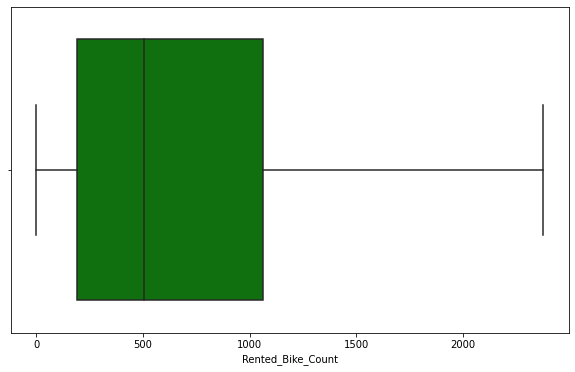

In [ ]:
#Ploting box plot for Rented_Bike_Count
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Rented_Bike_Count'] ,color="g")
plt.xlabel('Rented_Bike_Count')
plt.show()

In [ ]:
df.to_csv('file.csv') 

## **Exploratory Analysis**

---









Exploratory data analysis is the first and most important phase in any data analysis. EDA is a method or philosophy that aims to uncover the most important and frequently overlooked patterns in a data set.it is is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation. 

In [ ]:
#importing required labraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[Text(0.5, 1.0, 'Count of Rented bikes VS  Months ')]

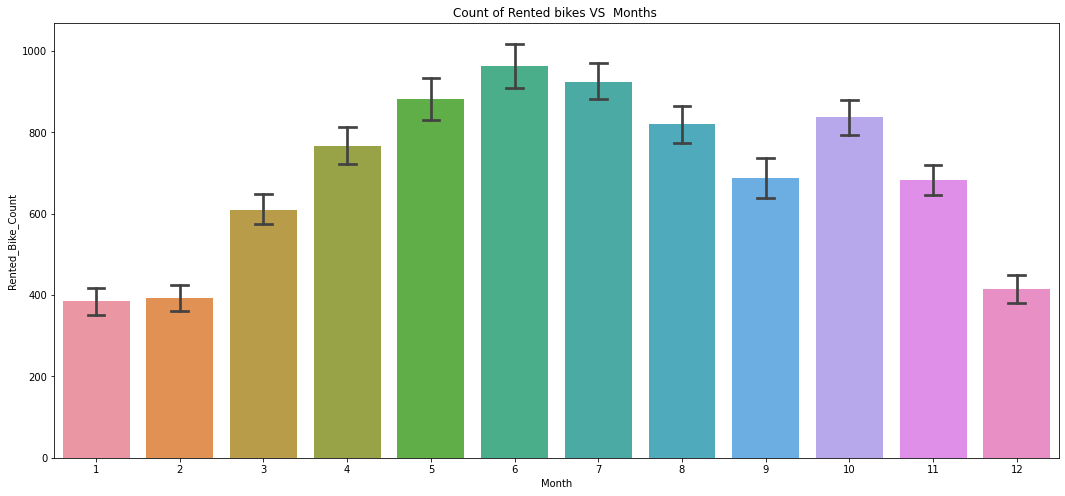

In [ ]:
#plotting bar plot for understanding count of rented bikes over months
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes VS  Months ')

[Text(0.5, 1.0, 'Count of Rented bikes VS weekend ')]

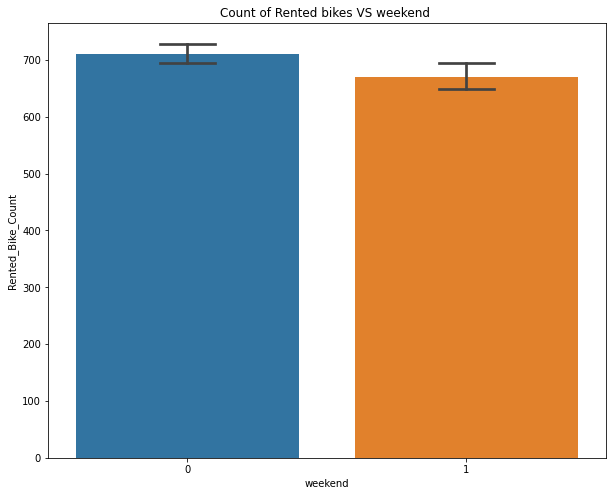

In [ ]:
#plotting bar plot for understanding count of rented bikes over weekends
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes VS weekend ')

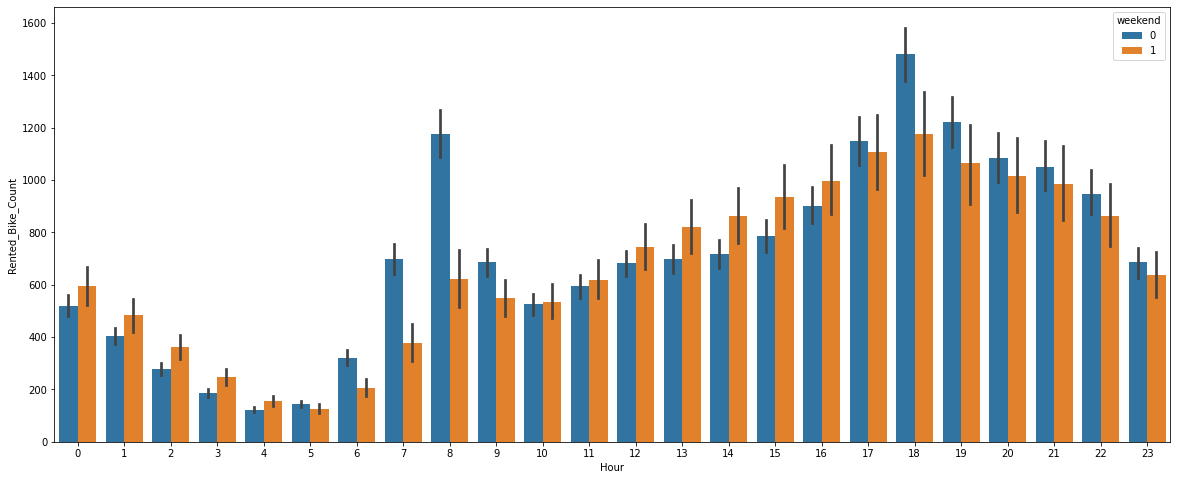

In [ ]:
#plotting bar plot for understanding count of rented bikes for hours and weekends
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekend',ax=ax)

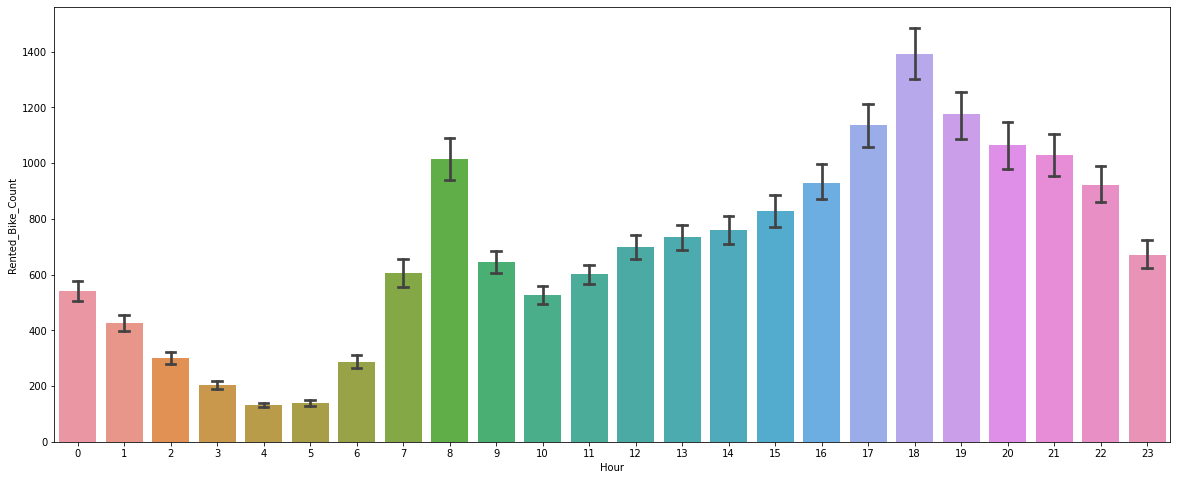

In [ ]:
#plotting bar plot for understanding count of rented bikes over Hours
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)

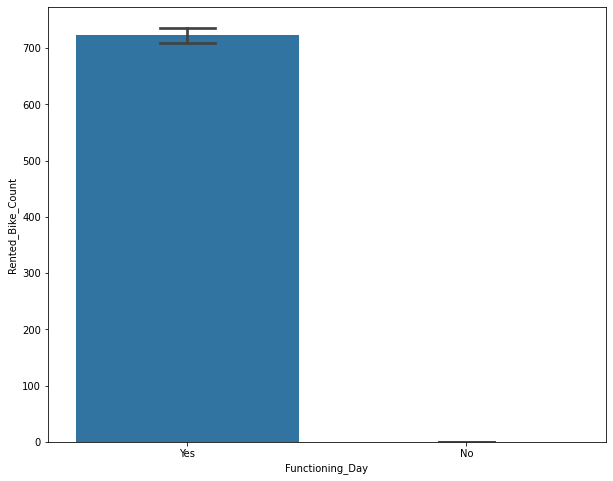

In [ ]:
#plotting bar plot for understanding count of rented bikes for function day
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)

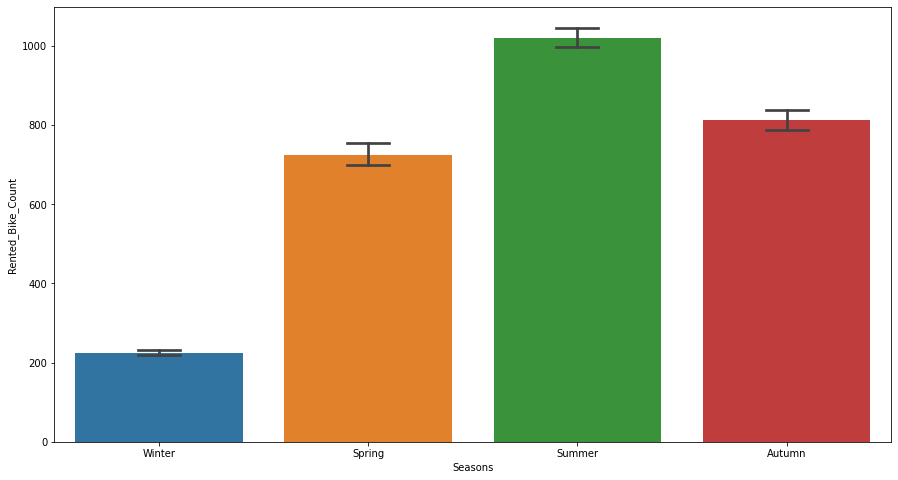

In [ ]:
#plotting bar plot for understanding count of rented bikes over seasons
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)

In [ ]:
#plotting line plot for understanding count of rented bikes for hours and seasons
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

In [ ]:
#plotting bar plot for understanding count of rented bikes for holidays
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

In [ ]:
#plotting line plot for understanding count of rented bikes for hours and holidays
fig,ax=plt.subplots(figsize=(18,8))
sns.lineplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

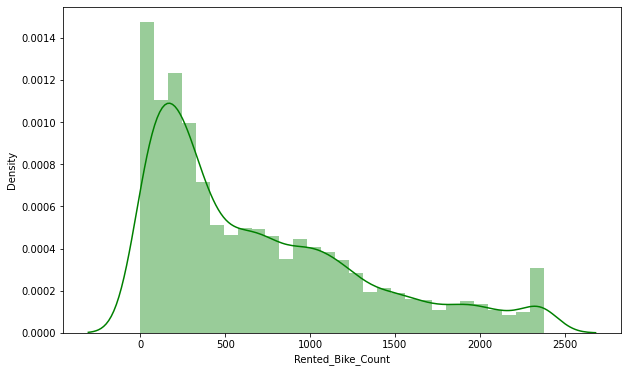

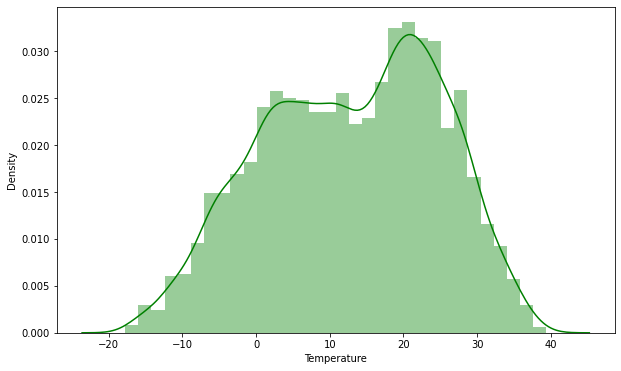

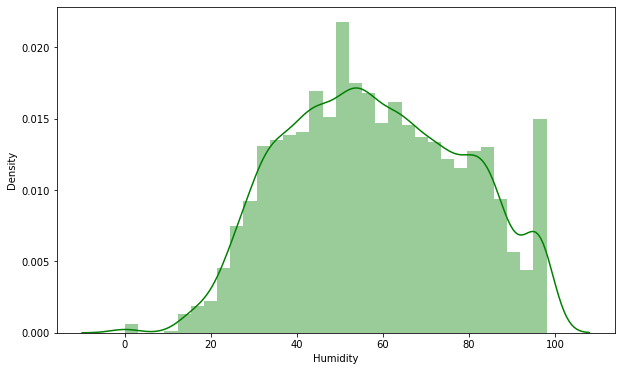

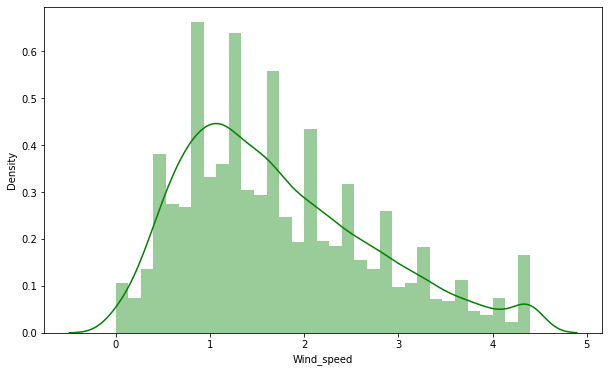

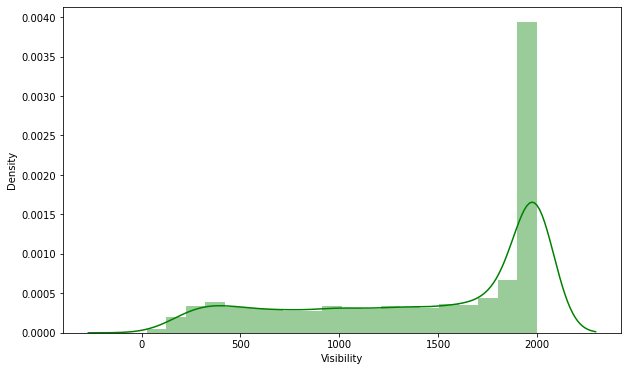

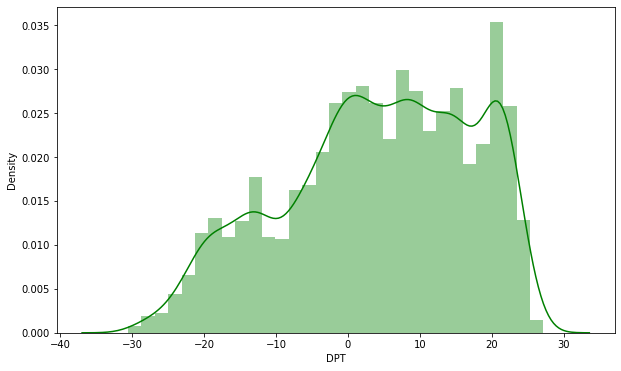

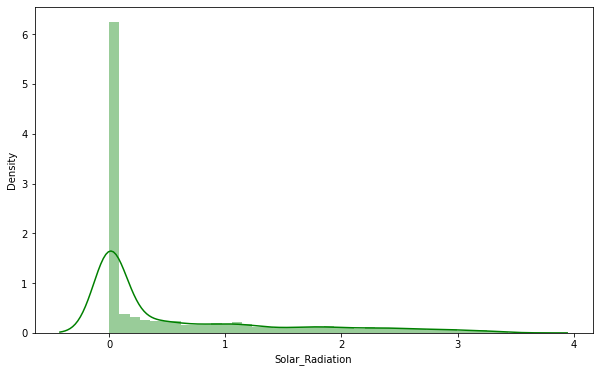

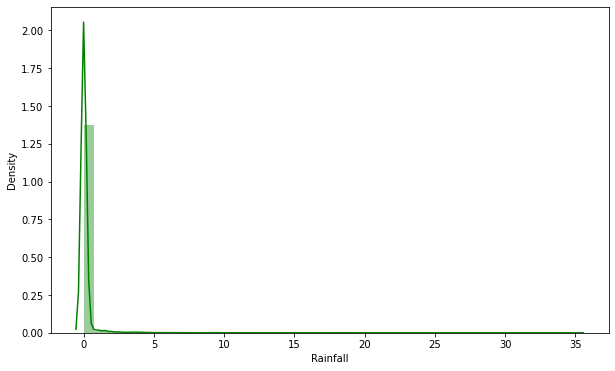

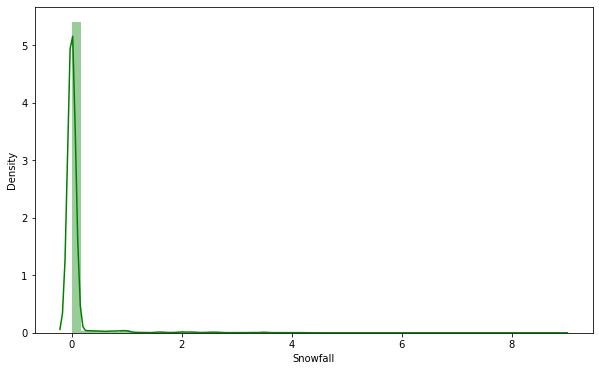

In [ ]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
#analyz and distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col] ,color="g")
  plt.xlabel(col)
plt.show()

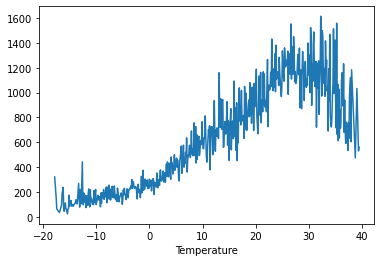

In [ ]:
#printing the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

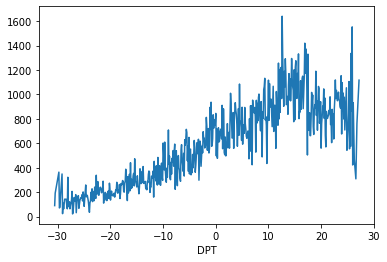

In [ ]:
#printing the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
df.groupby('DPT').mean()['Rented_Bike_Count'].plot()

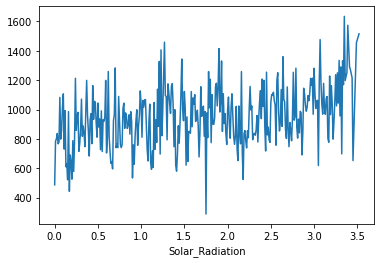

In [ ]:
#printing the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

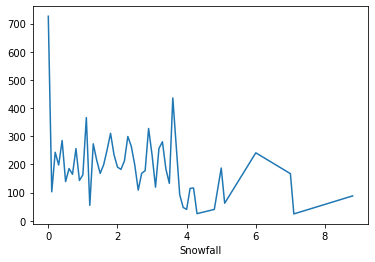

In [ ]:
#printing the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

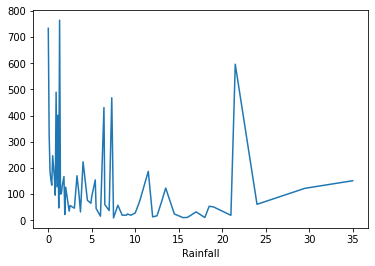

In [ ]:
#printing the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

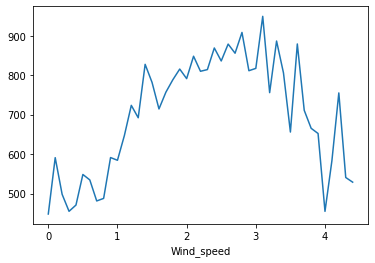

In [ ]:
#printing the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

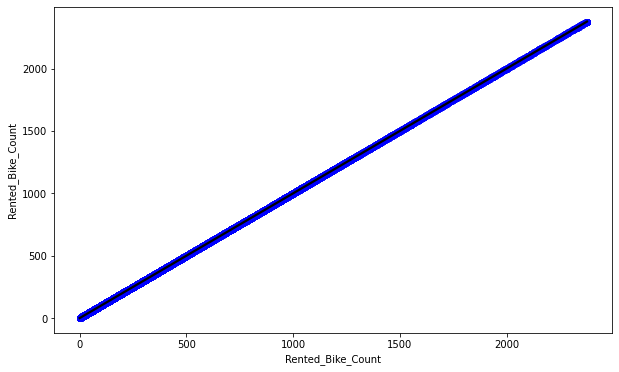

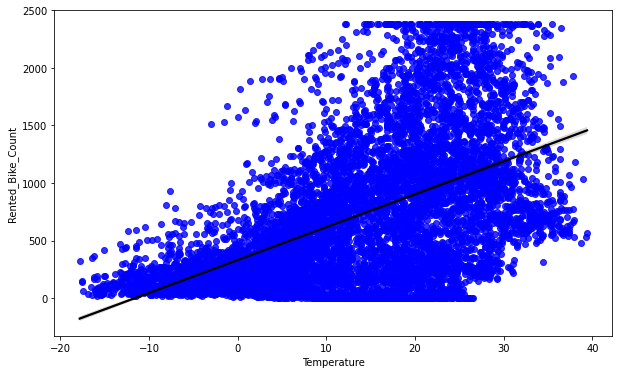

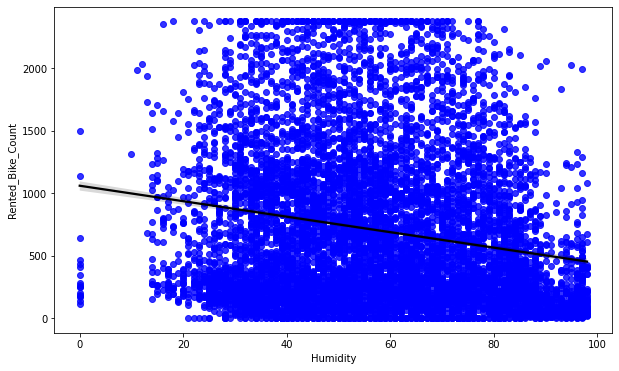

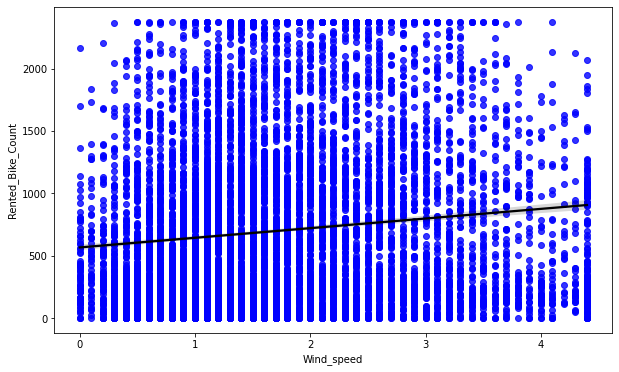

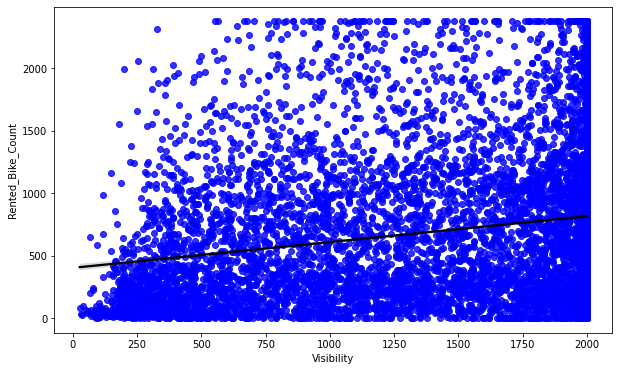

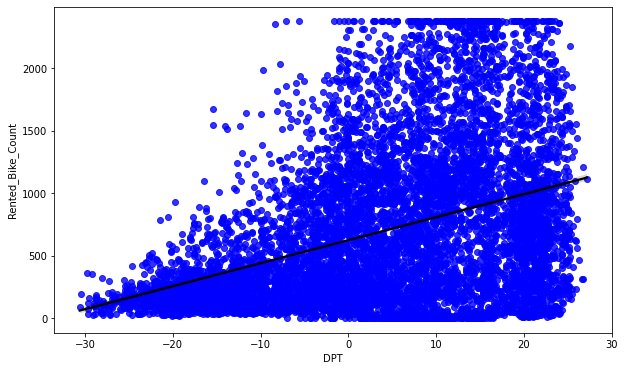

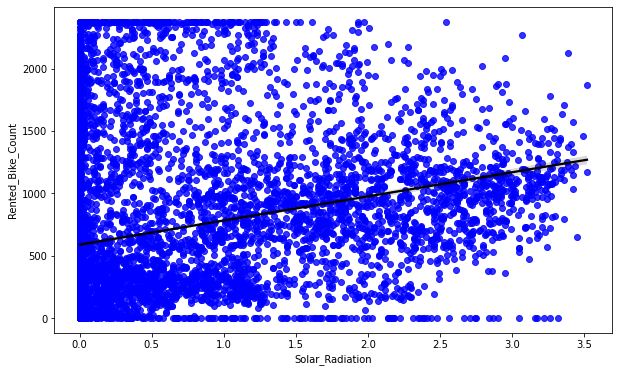

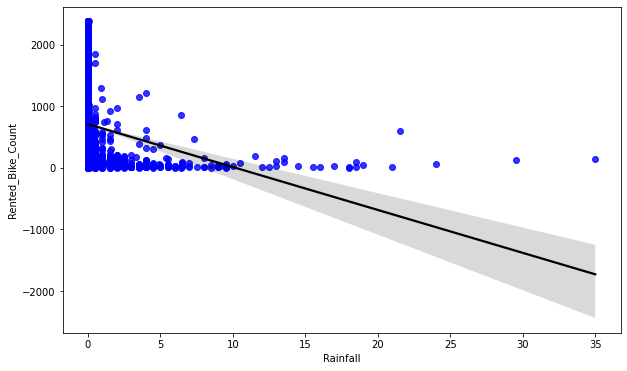

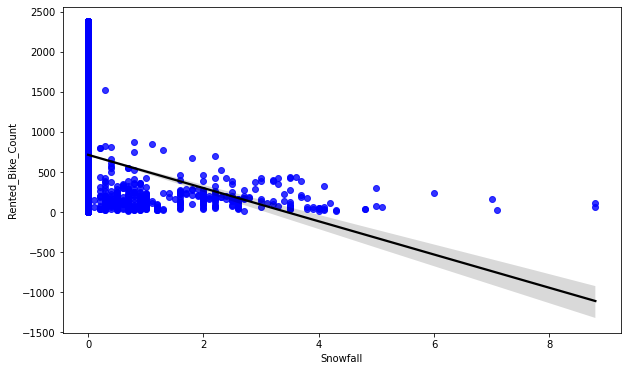

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})

From the above regression plot we can conclude that  numerical features like <b>
*    Temperature
*    Wind_speed 
*    Visibility
*    Dew_point_temperature 
*    Solar_Radiation

are positively related to the dependent variable rented bike count </b> 

 numerical features like <b>
*  Rainfall
*  Snowfall
*  Humidity
 
 these features are negatively related with the dependen variaable  rented bike count </b> 

That means as Temperature, Wind_speed, Visibility, Dew_point_temperature , Solar_Radiation increases you will see increase in demand of rental bike, and we can conclude that people showing intrest in driving rental bike in hot environment.As Rainfall, Snowfall, Humidity increases you will see decrease in demand of rental bike,people avoiding driving rental bike in cold environment

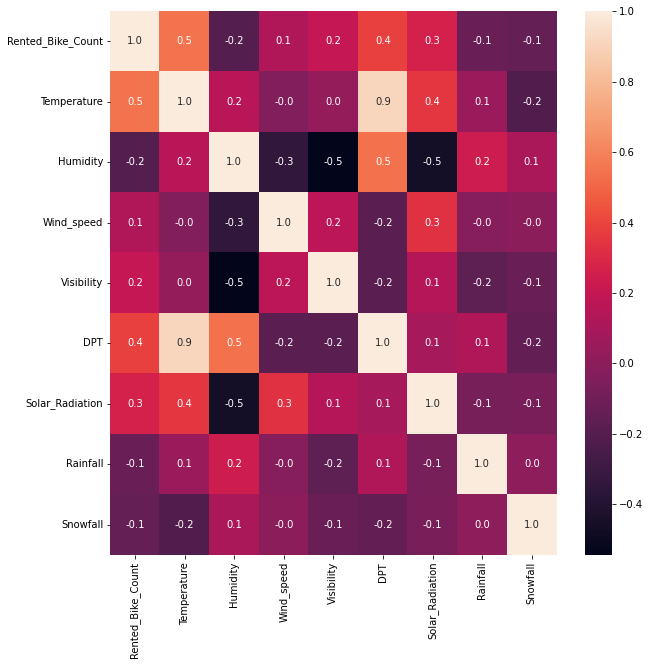

In [ ]:
# ploting heatmap for correlation between features
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

 Here We can observe on the heatmap that 
 most <b>positively correlated variables to the rented bike count are:</b>
<b>
*  Temperature
*   DPT( dew point temperature)
*   solar radiation
</b>

<b>
Most negatively correlated variable to the rented bike count are:`</b>
<b>

*    Humidity
*    Rainfall
</b>

From the above correlation heatmap,<b> We can see that there is a positive correlation between columns 'Temperature' and 'DPT'is 0.9% so it will be helpul if we drop the column 'DPT'</b> it wont affect on our analysis and by avoiding repeated data it will surely lead to good accuracy

In [ ]:
#droping column 'DPT
df.drop(columns=['DPT'],inplace=True)

In [ ]:
#cheaking columns data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   float64 
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  Month              8760 non-null   category
 13  weekend            8760 non-null   category
dtypes: category(3), float64(6), int64(2), object(3)
memory usage: 779.8+ KB


## **Create the dummy variables**

A dummy variable (aka, an indicator variable) is a numeric variable that represents categorical data, such as Hour, month, season, etc.


**Technically, dummy variables are quantitative variables. Their range of values is small; they can take on only two quantitative values. As a practical matter, regression results are easiest to interpret when dummy variables are limited to two specific values, 1 or 0. Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence**.

The number of dummy variables required to represent a particular categorical variable depends on the number of values that the categorical variable can assume. To represent a categorical variable that can assume k different values, a researcher would need to define k - 1 dummy variables.

For example, suppose we are interested in Holiday, a categorical variable that might assume two values - its Holiday or its not Holiday. We could represent Holiday with two dummy variables:

X1 = 1, if its not Holiday otherwise,

X1 = 0, if its not Holiday .


In [ ]:
#creating dummie variables of  'object'and 'category'datatype columns
dataset = pd.get_dummies(df, columns = ['Hour', 'Seasons', 'Holiday', 'Month','Functioning_Day','weekend'],drop_first=True)

In [ ]:
dataset=dataset.rename(columns={'Holiday_No Holiday':'Holiday_No '})

In [ ]:
#Cheaking dummie variables by ploting first 5 rows of dataset
dataset.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Functioning_Day_Yes,weekend_1
0,254.0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,204.0,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,173.0,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,107.0,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,78.0,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dataset.to_csv("clean.csv")

## **Model Training**

In [ ]:
#divideing data into dependent(y) and independent(X) variables
X = dataset.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset['Rented_Bike_Count'])

In [ ]:
#Splitting the Data into Training Data & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)


## **MaxAbs Scaler**


In MaxAbs-Scaler each feature is scaled by using its maximum value. At first, the absolute maximum value of the feature is found and then the feature values are divided with it. Just like MinMaxScaler MaxAbs Scaler are also sensitive to outliers.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler =MaxAbsScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#cheaking shape of X_train,X_test
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


## **LINEAR REGRESSION**

Let’s know what linear regression is. It is very important and used for easy analysis of the dependency of two variables. One variable will be considered to be an explanatory variable, while others will be considered to be a dependent variable. Linear regression is a linear method for modelling the relationship between the independent variables and dependent variables. The linearity of the learned relationship makes the interpretation very easy. Linear regression models have long been used by people as statisticians, computer scientists, etc. who tackle quantitative problems. 

The Formula of Linear Regression
Let’s know what a linear regression equation is. The formula for linear regression equation is given by:

## **y = a + bx**

 
a and b can be computed by the following formulas:

## **b= n∑xy−(∑x)(∑y) / n∑x2−(∑x)2**

## **a= ∑y−b(∑x) / n**

Where

x and y are the variables for which we will make the regression line.

* b =  Slope of the line.

* a =  Y-intercept of the line.

* X  = Values of the first data set.

* Y = Values of the second data set.



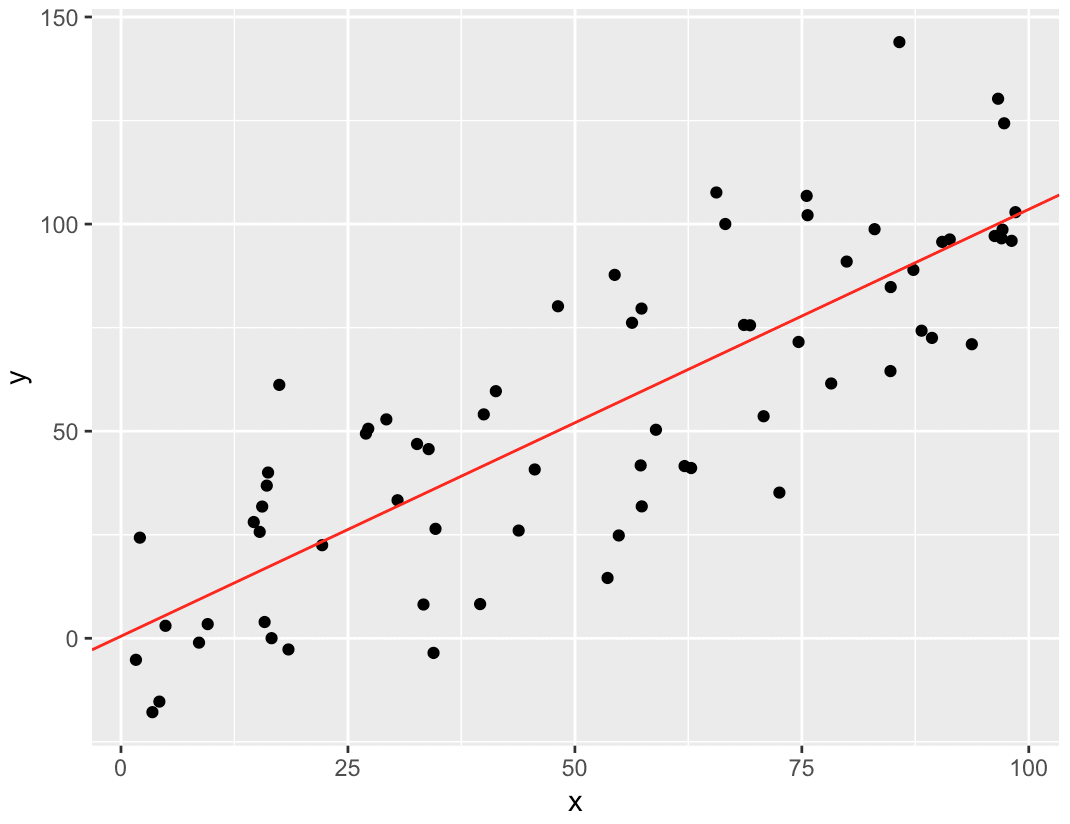

In the above diagrame the black dots we see are the distributin of 'Y' w.r.t 'X' there is no straight line that runs through all the data points So, the objective here is to fit the best fit of straight line that will try to minimize the error between the expected and actual value

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
#Fitting the model and printing y_pred
Lr= LinearRegression()
Lr.fit(X_train, y_train)
y_pred_test_Lr=Lr.predict(X_test)

In [ ]:
#calculating Mean Squared Error(MSE)
MSE_Lr= mean_squared_error(y_test, y_pred_test_Lr)
print("MSE :",MSE_Lr)

#calculating Root Mean Squared Error(RMSE)
RMSE_Lr=np.sqrt(MSE_Lr)
print("RMSE :",MSE_Lr)

#calculating Mean Absolute Error(MAE)
MAE_Lr= mean_absolute_error(y_test, y_pred_test_Lr)
print("MAE :",MAE_Lr)

#calculating r2
R2_Lr= r2_score((y_test), (y_pred_test_Lr))
print("R2 :",R2_Lr)


MSE : 35.46027202007788
RMSE : 35.46027202007788
MAE : 4.598503127926741
R2 : 0.7705947191472161


**R2 score of LINEAR REGRESSION model is 0.76. look like our model is performing well on the dataset.**

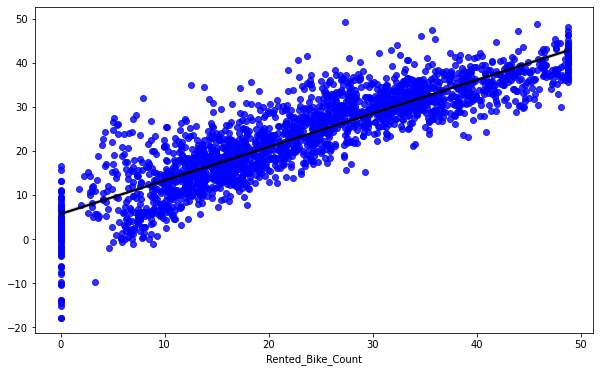

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.regplot(x=y_test,y=y_pred_test_Lr,scatter_kws={"color": 'blue'}, line_kws={"color": "black"})

## **LASSO REGRESSION**

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
#Fitting the model and printing y_pred
lasso.fit(X_train, y_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
#calculating Mean Squared Error(MSE)
MSE_lasso= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso)

#calculating Root Mean Squared Error(RMSE)
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#calculating Mean Absolute Error(MAE)
MAE_lasso= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)

#calculating r2
R2_lasso= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",R2_lasso)

MSE : 122.06169430857179
RMSE : 11.048153434333349
MAE : 8.79985829417873
R2 : 0.21033890410175515


**Here as you can see R2 score of LASSO REGRESSION model is 0.38. look like our model is performing not that well on the dataset.**

## **RIDGE REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [ ]:
#Fitting the model and printing y_pred
ridge.fit(X_train,y_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#calculating Mean Squared Error(MSE)
MSE_ridge= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge)

#calculating Root Mean Squared Error(RMSE)
RMSE_ridge=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_ridge)

#calculating Mean Absolute Error(MAE)
MAE_ridge= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge)

#calculating r2
R2_ridge= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",R2_ridge)

MSE : 35.48362059981072
RMSE : 11.048153434333349
MAE : 4.600188758708545
R2 : 0.7704436687692582


**R2 score of RIDGE REGRESSION model is 0.76. look like our model is performing well on the dataset.**

## **DECISION TREE**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)


In [ ]:
#Fitting the model and printing y_pred
decision_regressor.fit(X_train, y_train)
y_pred_test_DT = decision_regressor.predict(X_test)

In [ ]:
#calculating Mean Squared Error(MSE)
MSE_DT= mean_squared_error(y_test, y_pred_test_DT)
print("MSE :",MSE_DT)

#calculating Root Mean Squared Error(RMSE)
RMSE_DT=np.sqrt(MSE_DT)
print("RMSE :",RMSE_DT)

#calculating Mean Absolute Error(MAE)
MAE_DT= mean_absolute_error(y_test, y_pred_test_DT)
print("MAE :",MAE_DT)

#calculating r2
R2_DT= r2_score((y_test), (y_pred_test_DT))
print("R2 :",R2_DT)

MSE : 70.09478743665194
RMSE : 8.372262981813934
MAE : 5.866554613192666
R2 : 0.5465315553948191


**R2 score of DECISION TREE model is 0.56. look like our model is performing well on the dataset.**

## **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
#Fitting the model and printing y_pred
rf_model.fit(X_train,y_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#calculating Mean Squared Error(MSE)
MSE_RF= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_RF)

#calculating Root Mean Squared Error(RMSE)
RMSE_RF=np.sqrt(MSE_RF)
print("RMSE :",RMSE_RF)

#calculating Mean Absolute Error(MAE)
MAE_RF= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_RF)

#calculating r2
R2_RF= r2_score((y_test), (y_pred_test_rf))
print("R2 :",R2_RF)

MSE : 15.382922163400737
RMSE : 3.922106852624076
MAE : 2.5328978390679664
R2 : 0.9004823319676353


**here as you can see R2 score of RANDOM FOREST model is 0.90. that means  our model is performing well and model is able to capture most of the data variance.**

## **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
#Fitting the model and printing y_pred
gb_model.fit(X_train,y_train)
y_pred_test_gb = gb_model.predict(X_test)

In [ ]:
#calculating Mean Squared Error(MSE)
MSE_GB= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE_GB)

#calculating Root Mean Squared Error(RMSE)
RMSE_GB=np.sqrt(MSE_GB)
print("RMSE :",RMSE_GB)

#calculating Mean Absolute Error(MAE)
MAE_GB= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_GB)

#calculating r2
R2_GB= r2_score((y_test), (y_pred_test_gb))
print("R2 :",R2_GB)

MSE : 23.068443912129894
RMSE : 4.8029619936170524
MAE : 3.613595750061539
R2 : 0.8507619216371926


**R2 score of GRADIENT BOOSTING model is 0.85. look like our model is performing well on the dataset.**

## **Building a Predictive System**

---



In [ ]:
#creating input data as per features in the dataset
input_data = (-5.5,38,2.2,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction**2)


[115.6504217]


## **Creating a Pickle File**

---

Pickle is a Standard way of serializing objects in Python. It can be a Machine Learning Algorithm You can serialize and save the model or Object using Pickle . It is saved in a serialized format as a file.When you need to re-use or re-load the same Model or Object , you can reload and de-serialize the file using Pickle


In [ ]:
#Create a Pickle file using serialization 
import pickle
pickle_out = open("Lr_model.pkl","wb")
pickle.dump(Lr, pickle_out)
pickle_out.close()

## **CONCLUSION**

---



As we started  our analysis, in  initiall stages we performed Exploratory  Data Analysis(EDA) on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' with independet variables month, weekend and hours which where categorical variable too.further we moved toword numerical variable after analyseing numerical variable, found out the correlation, distribuion and their relationship with the dependent variable. We also removed some numerical features.could create dummie variables of categorical variables.in last  we implemented 6 machine learning algorithms Linear Regression,lasso,ridge,decission tree, Random Forest and XGBoost.none of them showed overfitting.**Random Forest Model has given accuracy upto 90%** which is  preety good for prediction and choosing it for deployment.
As rental Bike share systems have been growing across the world. our analyssis and trained model will surely help to predict demand of the bikes However enviormental factors like temperature, windspeed, solar radiation etc., will not always be stable.Therefore, there will be scenarios where the model might not perform well